# Evaluating Classifiers
This will be a review session on evaluating classification models using confusion matrices, precision, recall, and ROC curves. 

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_color_codes()

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

%matplotlib inline

## Generate Sample Data

In [83]:
sample = make_classification(n_samples=1000, n_features = 20)
X = sample[0]
y = sample[1]

In [84]:
train_X, test_X, train_y, test_y = train_test_split(X,y)

## Logistic Regression

In [110]:
#Insitiate
lr = LogisticRegression()

#Fit
lr.fit(train_X, train_y)

#Predict
test_y_proba = lr.predict_proba(test_X)

#Predict Probabilities of + Class
test_y_pred = lr.predict(test_X)

## Accuracy

In [126]:
accuracy = accuracy_score(test_y, test_y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.832


83% of the time we are correctly predicting an observation to be in Group A or B. However, when does this metric begin to break down? 

Are we making systematic types of error? 

* *Type I Error*: Are we more often guessing that an observation is in Group A when it is actually in Group? Aka False Positive 

* *Type II Error*: Are we not detecting all the observations that are in Group A? aka False Negative.

In [92]:
df = pd.DataFrame(test_X)
df['y'] = test_y
df['y_pred'] = test_y_pred
df['y_proba'] = test_y_proba[:,1]

## Confusion Matrix

In [88]:
confusion_matrix(test_y, test_y_pred)

array([[110,  17],
       [ 25,  98]])

In [121]:
tn, fp, fn, tp = confusion_matrix(test_y, test_y_pred).ravel()

print("True Negatives: {}".format(tn))
print("")
print("False Positives: {}".format(fp))
print("")
print("False Negatives: {}".format(fn))
print("")
print("True Positives: {}". format(tp))

True Negatives: 110

False Positives: 17

False Negatives: 25

True Positives: 98


## Probability Distribution

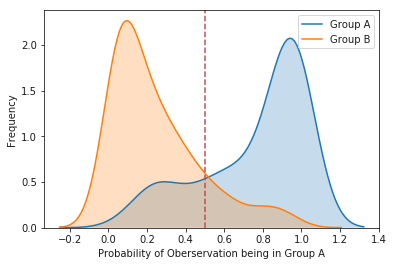

In [118]:
ax = sns.kdeplot(df[df['y'] == 1]['y_proba'], shade=True, label="Group A")
ax = sns.kdeplot(df[df['y'] == 0]['y_proba'], shade=True, label="Group B")
ax.axvline(.5, color='r', linestyle='--')
plt.xlabel('Probability of Oberservation being in Group A')
plt.ylabel('Frequency');

## ROC Curve

In [112]:
fpr, tpr, _ = roc_curve(test_y, test_y_proba[:,1])
auc_ = auc(fpr, tpr)

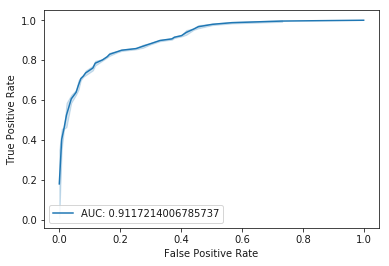

In [115]:
ax = sns.lineplot(fpr, tpr, label="AUC: {}".format(auc_))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');